In [10]:
# load data

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Electric_Production.csv')

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
# (a) find null values

df.isnull().sum()

IPG2211A2N    0
dtype: int64

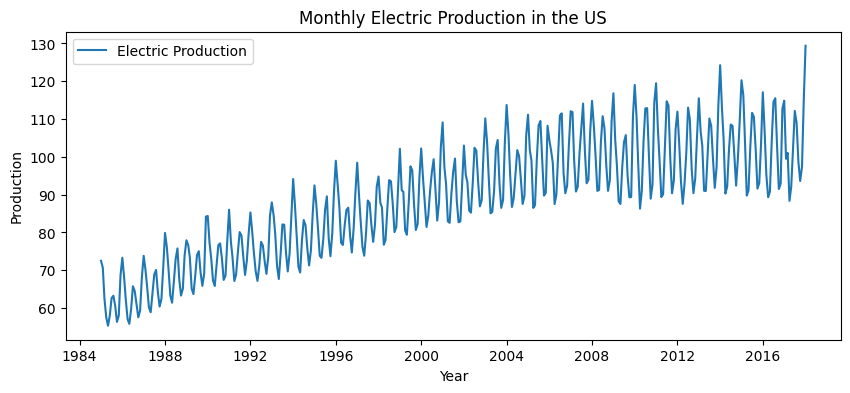

In [12]:
# (b) find seasonal/ cyclic patterns

plt.figure(figsize=(10,4))
plt.plot(df, label="Electric Production")
plt.title("Monthly Electric Production in the US")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.show()

In [13]:
# (c) Check stationarity of trainig data

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['IPG2211A2N'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.25699035004725
p-value: 0.18621469116586592


In [14]:
# (d) Make the data stationary using differencing

df_diff = df.diff().dropna()

result_diff = adfuller(df_diff['IPG2211A2N'])
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])

ADF Statistic (differenced): -7.104890882267312
p-value (differenced): 4.0777865655394095e-10


In [15]:
# (f) Forecating the data for a lag value

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
print(forecast)

C:\Users\Maduranga\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maduranga\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maduranga\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2018-02-01    133.477101
2018-03-01    133.775154
2018-04-01    133.796969
2018-05-01    133.798565
2018-06-01    133.798682
2018-07-01    133.798691
2018-08-01    133.798691
2018-09-01    133.798691
2018-10-01    133.798691
2018-11-01    133.798691
2018-12-01    133.798691
2019-01-01    133.798691
Freq: MS, Name: predicted_mean, dtype: float64


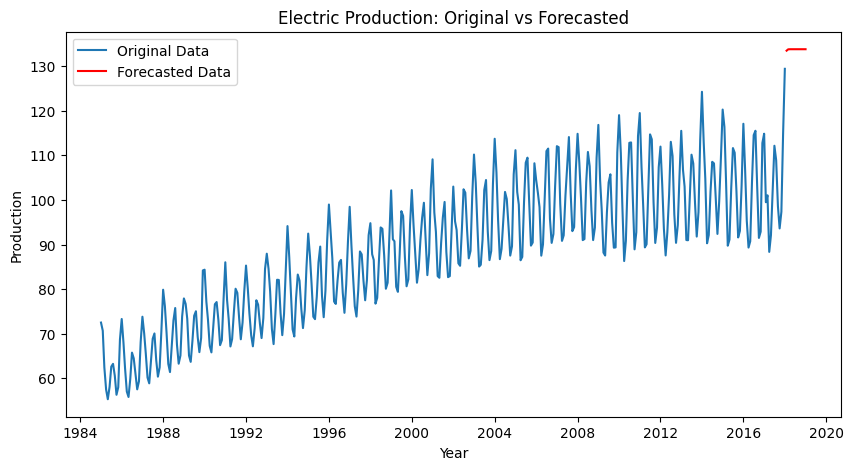

In [16]:
# (f) plot original and forecasted data

plt.figure(figsize=(10,5))
plt.plot(df, label='Original Data')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.title('Electric Production: Original vs Forecasted')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()